In [1]:
import numpy as np
from numpy import deg2rad, cos
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
## The script is used to reproduce: 
##         Fig. 3. Spatial patterns of the boreal summer surface temperature anomalies in relation to indices indicative of QRA events or QRA-favorable conditions.

# Define homepath
homepath = "/pscratch/sd/x/xueke/"

# Plot settings
labelsize = 14
size = 16
cmap = plt.cm.RdBu_r

vmin = -0.5
vmax = 0.5
step = 21
levels = np.linspace(vmin, vmax, step)

shrink = 1.0
pad = 0.01
aspect = 24
linewidth = 2

## QRA zonal fingerprint

In [3]:
# QRA fingerprint: the zonal mean temperature profile averaged over QRA events minus 
# the climatological zonal-mean temperature profile. 
QRAf_fp = homepath + 'data/T_QRA_JJA_NH_ERA_2p5dg_lat-25n-75n_anom.nc'
ds_QRAf  = xr.open_dataset(QRAf_fp, decode_times=False)
tas_QRAf = ds_QRAf['tas'].data[0,:,0] 
tas_QRAf = tas_QRAf[:] # (11)
lat_QRAf = ds_QRAf['lat'].data

# Calculate mean and standard deviation of the QRA zonal fingerprint
tas_QRAf_mean = np.nanmean(tas_QRAf)
tas_QRAf_std = np.nanstd(tas_QRAf)

## Regression coefficients for ERA5 surface temperature anomalies with the reanalysis-based QRA count series

In [4]:
# Read netDCF file
reg_slope_freq_ERA5t2m_fp = homepath + "data/RC_slope_ERA5-based QRA frequency_norm2_ERA5t2m.nc"
reg_pval_freq_ERA5t2m_fp = homepath + "data/RC_pval_ERA5-based QRA frequency_norm2_ERA5t2m.nc"
reg_slope_freq_ERA5t2m = xr.open_mfdataset(reg_slope_freq_ERA5t2m_fp, decode_times=False).t2m
reg_pval_freq_ERA5t2m = xr.open_mfdataset(reg_pval_freq_ERA5t2m_fp, decode_times=False).t2m

# Calculate the zonally-averaged anomalies
reg_slope_freq_ERA5t2m_temp = reg_slope_freq_ERA5t2m[100:301] # Constrain lat from 25 to 75N to be consistent with QRA zonal fingerprint
lat_weights1 = cos(deg2rad(reg_slope_freq_ERA5t2m_temp.latitude))
reg_slope_freq_ERA5t2m_weighted = reg_slope_freq_ERA5t2m_temp.weighted(lat_weights1)
reg_slope_freq_ERA5t2m_weighted_zonal_mean = reg_slope_freq_ERA5t2m_weighted.mean(dim='longitude')
lat_reg_slope_freq_ERA5t2m = reg_slope_freq_ERA5t2m_weighted_zonal_mean.latitude.values # 2 degree interval

# Center and normalize the zonally-averaged anomalies so they are same as the actual (reanalysys) QRA series during interval of overlap
reg_slope_freq_ERA5t2m_weighted_zonal_mean_centered = reg_slope_freq_ERA5t2m_weighted_zonal_mean - np.nanmean(reg_slope_freq_ERA5t2m_weighted_zonal_mean)
reg_slope_freq_ERA5t2m_weighted_zonal_mean_norm = reg_slope_freq_ERA5t2m_weighted_zonal_mean_centered * (tas_QRAf_std / np.nanstd(reg_slope_freq_ERA5t2m_weighted_zonal_mean_centered)) + tas_QRAf_mean

print("**************** Check the freq mean and std for consistency ****************")
print(np.nanmean(tas_QRAf))
print(np.nanstd(tas_QRAf))
print(np.nanmean(reg_slope_freq_ERA5t2m_weighted_zonal_mean_norm.values))
print(np.nanstd(reg_slope_freq_ERA5t2m_weighted_zonal_mean_norm.values))

**************** Check the freq mean and std for consistency ****************
9.146723782423164e-18
0.2633739145074573
3.5350384863686576e-17
0.26337391450745723


## Regression coefficients for GISS surface temperature anomalies with the reanalysis-based QRA count series

In [5]:
# Read netDCF file
reg_slope_freq_fp = homepath + "data/RC_slope_ERA5-based QRA frequency_norm2.nc"
reg_pval_freq_fp = homepath + "data/RC_pval_ERA5-based QRA frequency_norm2.nc"
reg_slope_freq = xr.open_mfdataset(reg_slope_freq_fp, decode_times=False).tempanomaly
reg_pval_freq = xr.open_mfdataset(reg_pval_freq_fp, decode_times=False).tempanomaly

# Calculate the zonally-averaged anomalies
reg_slope_freq_temp = reg_slope_freq[12:38] # Constrain lat from 25 to 75N to be consistent with QRA zonal fingerprint
lat_weights2 = cos(deg2rad(reg_slope_freq_temp.lat))
reg_slope_freq_weighted = reg_slope_freq_temp.weighted(lat_weights2)
reg_slope_freq_weighted_zonal_mean = reg_slope_freq_weighted.mean(dim='lon')
lat_reg_slope_freq = reg_slope_freq_weighted_zonal_mean.lat.values # 2 degree interval

# Center and normalize the zonally-averaged anomalies
reg_slope_freq_weighted_zonal_mean_centered = reg_slope_freq_weighted_zonal_mean - np.nanmean(reg_slope_freq_weighted_zonal_mean)
reg_slope_freq_weighted_zonal_mean_norm = reg_slope_freq_weighted_zonal_mean_centered * (tas_QRAf_std / np.nanstd(reg_slope_freq_weighted_zonal_mean_centered)) + tas_QRAf_mean

print("**************** Check the freq mean and std for consistency ****************")
print(np.nanmean(tas_QRAf))
print(np.nanstd(tas_QRAf))
print(np.nanmean(reg_slope_freq_weighted_zonal_mean_norm.values))
print(np.nanstd(reg_slope_freq_weighted_zonal_mean_norm.values))

**************** Check the freq mean and std for consistency ****************
9.146723782423164e-18
0.2633739145074573
-4.054835e-08
0.26337394


## Regression coefficients for GISS surface temperature anomalies with the GISTEMP QRA fingerprint series 

In [6]:
# Read netDCF file
reg_slope_QRA_GISTEMP2_fp = homepath + "data/RC_slope_GISS-based QRA fingerprint_norm2.nc"
reg_pval_QRA_GISTEMP2_fp = homepath + "data/RC_pval_GISS-based QRA fingerprint_norm2.nc"
reg_slope_QRA_GISTEMP2 = xr.open_mfdataset(reg_slope_QRA_GISTEMP2_fp, decode_times=False).tempanomaly
reg_pval_QRA_GISTEMP2 = xr.open_mfdataset(reg_pval_QRA_GISTEMP2_fp, decode_times=False).tempanomaly

# Calculate the zonally-averaged anomalies
reg_slope_QRA_GISTEMP2_temp = reg_slope_QRA_GISTEMP2[12:38] # Constrain lat from 25 to 75N to be consistent with QRA zonal fingerprint
lat_weights3 = cos(deg2rad(reg_slope_QRA_GISTEMP2_temp.lat))
reg_slope_QRA_GISTEMP2_weighted = reg_slope_QRA_GISTEMP2_temp.weighted(lat_weights3)
reg_slope_QRA_GISTEMP2_weighted_zonal_mean = reg_slope_QRA_GISTEMP2_weighted.mean(dim='lon')
lat_reg_slope_QRA_GISTEMP2 = reg_slope_QRA_GISTEMP2_weighted_zonal_mean.lat.values # 2 degree interval

# Center and normalize the zonally-averaged anomalies
reg_slope_QRA_GISTEMP2_weighted_zonal_mean_centered = reg_slope_QRA_GISTEMP2_weighted_zonal_mean - np.nanmean(reg_slope_QRA_GISTEMP2_weighted_zonal_mean)
reg_slope_QRA_GISTEMP2_weighted_zonal_mean_norm = reg_slope_QRA_GISTEMP2_weighted_zonal_mean_centered * (tas_QRAf_std / np.nanstd(reg_slope_QRA_GISTEMP2_weighted_zonal_mean_centered)) + tas_QRAf_mean

print("**************** Check the freq mean and std for consistency ****************")
print(np.nanmean(tas_QRAf))
print(np.nanstd(tas_QRAf))
print(np.nanmean(reg_slope_QRA_GISTEMP2_weighted_zonal_mean_norm.values))
print(np.nanstd(reg_slope_QRA_GISTEMP2_weighted_zonal_mean_norm.values))

**************** Check the freq mean and std for consistency ****************
9.146723782423164e-18
0.2633739145074573
0.0
0.26337394


## Land boundary shapefile

In [7]:
land_bdry = gpd.read_file(homepath + 'data/WB_Land_10m/WB_Land_10m.shp')
land_bdry = land_bdry.to_crs('EPSG:4326')

/tmp/ipykernel_2172374/2835972293.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['$200\degree$ W', '$150\degree$ W', '$100\degree$ W', '$50\degree$ W', '0',
/tmp/ipykernel_2172374/2835972293.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['$25\degree$ N', '$50\degree$ N', '$75\degree$ N'])
/tmp/ipykernel_2172374/2835972293.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['$200\degree$ W', '$150\degree$ W', '$100\degree$ W', '$50\degree$ W', '0',
/tmp/ipykernel_2172374/2835972293.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['$25\degree$ N', '$50\degree$ N', '$75\degree$ N'])
/tmp/ipykernel_2172374/2835972293.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_yticklabels(['$25\degree$ N', '$50\degree$ N', '$75\degree$ N'

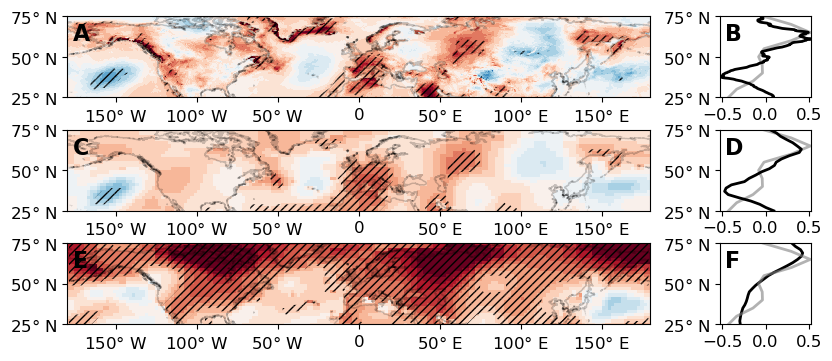

In [8]:
fig = plt.figure(figsize=(10.5,4))
gs = gridspec.GridSpec(3, 2, width_ratios=[8,1]) 

ax1 = plt.subplot(gs[0])                 # (a)      
ax2 = plt.subplot(gs[1], sharey = ax1)   # (b)
ax3 = plt.subplot(gs[2], sharex = ax1)   # (a)      
ax4 = plt.subplot(gs[3], sharey = ax3)   # (b)
ax5 = plt.subplot(gs[4], sharex = ax3)   # (c)
ax6 = plt.subplot(gs[5], sharey = ax5)   # (d)

#################  (A-B) ERA5 surface temperature anomalies with the reanalysis-based QRA count series #################
p_freq_ERA5t2m = reg_slope_freq_ERA5t2m.plot(ax=ax1, cmap=cmap, levels=levels, extend='both', add_colorbar=False) 
c_freq_ERA5t2m = ax1.contourf(reg_pval_freq_ERA5t2m.longitude, reg_pval_freq_ERA5t2m.latitude, reg_pval_freq_ERA5t2m.where(reg_pval_freq_ERA5t2m<0.05)[:,:], colors='none', 
                hatches=[2*'//'], zorder=10)
land_bdry.plot(edgecolor='black', facecolor="None", alpha = 0.2, linewidth=1, ax=ax1)

ax1.tick_params(axis='both', which='major', labelsize=labelsize-2)
ax1.set_xticklabels(['$200\degree$ W', '$150\degree$ W', '$100\degree$ W', '$50\degree$ W', '0', 
                     '$50\degree$ E', '$100\degree$ E', '$150\degree$ E', '$200\degree$ E'])
ax1.set_yticklabels(['$25\degree$ N', '$50\degree$ N', '$75\degree$ N'])
ax1.set_title("", fontsize=size)
ax1.set_xlabel("", fontsize=size)
ax1.set_ylabel("", fontsize=size)
ax1.set_xlim(-180,180)
ax1.set_ylim(25,75)
ax1.text(0.01, 0.92,"A", color="black", verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, fontsize=size, weight='bold')

ax2.plot(tas_QRAf, lat_QRAf, color='gray', alpha=0.6, linewidth=linewidth)
ax2.plot(reg_slope_freq_ERA5t2m_weighted_zonal_mean_norm.values, lat_reg_slope_freq_ERA5t2m, color='black', linewidth=linewidth)
ax2.tick_params(axis='both', which='major', labelsize=labelsize-2)
ax2.set_title("", fontsize=size)
ax2.set_xlabel("", fontsize=size)
ax2.set_ylabel("", fontsize=size)
ax2.set_xlim(-0.52,0.52)
ax2.set_ylim(25,75)
ax2.text(0.05, 0.92,"B", color="black", verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, fontsize=size, weight='bold')

################# (C-D) GISS surface temperature anomalies with the reanalysis-based QRA count series #################
p_freq = reg_slope_freq.plot(ax=ax3, cmap=cmap, levels=levels, extend='both', add_colorbar=False) 
c_freq = ax3.contourf(reg_pval_freq.lon, reg_pval_freq.lat, reg_pval_freq.where(reg_pval_freq<0.05)[:,:], colors='none', 
                hatches=[2*'//'], zorder=10)

land_bdry.plot(edgecolor='black', facecolor="None", alpha = 0.2, linewidth=1, ax=ax3)

ax3.tick_params(axis='both', which='major', labelsize=labelsize-2)
ax3.set_xticklabels(['$200\degree$ W', '$150\degree$ W', '$100\degree$ W', '$50\degree$ W', '0', 
                     '$50\degree$ E', '$100\degree$ E', '$150\degree$ E', '$200\degree$ E'])
ax3.set_yticklabels(['$25\degree$ N', '$50\degree$ N', '$75\degree$ N'])
ax3.set_title("", fontsize=size)
ax3.set_xlabel("", fontsize=size)
ax3.set_ylabel("", fontsize=size)
ax3.set_xlim(-180,180)
ax3.set_ylim(25,75)
ax3.text(0.01, 0.92,"C", color="black", verticalalignment='top', horizontalalignment='left', transform=ax3.transAxes, fontsize=size, weight='bold')

ax4.plot(tas_QRAf, lat_QRAf, color='gray', alpha=0.6, linewidth=linewidth)
ax4.plot(reg_slope_freq_weighted_zonal_mean_norm.values, lat_reg_slope_freq, color='black', linewidth=linewidth)
ax4.tick_params(axis='both', which='major', labelsize=labelsize-2)
ax4.set_title("", fontsize=size)
ax4.set_xlabel("", fontsize=size)
ax4.set_ylabel("", fontsize=size)
ax4.set_xlim(-0.52,0.52)
ax4.set_ylim(25,75)
ax4.text(0.05, 0.92,"D", color="black", verticalalignment='top', horizontalalignment='left', transform=ax4.transAxes, fontsize=size, weight='bold')

################# (E-F) GISS surface temperature anomalies with the GISTEMP QRA fingerprint series #################
p_GISTEMP2 = reg_slope_QRA_GISTEMP2.plot(ax=ax5, cmap=cmap, levels=levels, extend='both', add_colorbar=False) 
c_GISTEMP2 = ax5.contourf(reg_pval_QRA_GISTEMP2.lon, reg_pval_QRA_GISTEMP2.lat, reg_pval_QRA_GISTEMP2.where(reg_pval_QRA_GISTEMP2<0.05)[:,:], colors='none', 
                hatches=[2*'//'], zorder=10)
land_bdry.plot(edgecolor='black', facecolor="None", alpha = 0.2, linewidth=1, ax=ax5)

ax5.tick_params(axis='both', which='major', labelsize=labelsize-2)
ax5.set_yticklabels(['$25\degree$ N', '$50\degree$ N', '$75\degree$ N'])
ax5.set_title("", fontsize=size)
ax5.set_xlabel("", fontsize=size)
ax5.set_ylabel("", fontsize=size)
ax5.set_ylim(25,75)
ax5.text(0.01, 0.92,"E", color="black", verticalalignment='top', horizontalalignment='left', transform=ax5.transAxes, fontsize=size, weight='bold')

ax6.plot(reg_slope_QRA_GISTEMP2_weighted_zonal_mean_norm.values, lat_reg_slope_QRA_GISTEMP2, color='black', linewidth=linewidth)
ax6.plot(tas_QRAf, lat_QRAf, color='gray', alpha=0.6, linewidth=linewidth)
ax6.tick_params(axis='both', which='major', labelsize=labelsize-2)
ax6.set_title("", fontsize=size)
ax6.set_xlabel("", fontsize=size)
ax6.set_ylabel("", fontsize=size)
ax6.set_xlim(-0.52,0.52)
ax6.set_ylim(25,75)
ax6.text(0.05, 0.92,"F", color="black", verticalalignment='top', horizontalalignment='left', transform=ax6.transAxes, fontsize=size, weight='bold')

# ################################################
# # Uncomment this to save colorbar separately
# ax1.remove()
# ax2.remove()
# ax3.remove()
# ax4.remove()
# ax5.remove()
# ax6.remove()
# fig.subplots_adjust(bottom=0.8)
# cbar_ax = fig.add_axes([0., 0., 0.5, 0.04]) # l, b, w, h
# cb_GISTEMP2 = fig.colorbar(p_GISTEMP2, cax=cbar_ax, shrink=shrink, pad=pad, aspect=aspect, orientation='horizontal')
# cb_GISTEMP2.set_ticks(levels[::2])
# cb_GISTEMP2.ax.tick_params(labelsize=labelsize-2) 
# ################################################

plt.subplots_adjust(wspace=0, hspace=0.4)